In [5]:
!pip install keras

In [7]:
!pip install TensorFlow

     |████████████████████████████████| 175.3 MB 30 kB/s  eta 0:00:011   |████████▎                       | 45.2 MB 3.7 MB/s eta 0:00:36     |███████████▉                    | 64.5 MB 3.9 MB/s eta 0:00:29     |████████████                    | 65.6 MB 3.9 MB/s eta 0:00:28     |██████████████▌                 | 79.5 MB 8.6 MB/s eta 0:00:12     |███████████████████▊            | 107.9 MB 12.2 MB/s eta 0:00:06     |███████████████████████▏        | 126.8 MB 7.3 MB/s eta 0:00:07     |███████████████████████▍        | 128.0 MB 7.3 MB/s eta 0:00:07     |███████████████████████▊        | 129.8 MB 7.3 MB/s eta 0:00:07     |██████████████████████████▉     | 146.9 MB 3.7 MB/s eta 0:00:08
     |████████████████████████████████| 2.8 MB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 454 kB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 6.1 MB/s  eta 0:00:01
     |████████████████████████████████| 4

In [9]:
!pip install wordcloud

     |████████████████████████████████| 160 kB 2.6 MB/s eta 0:00:01


In [10]:
import pandas as pd
import os
import re
import spacy
import gensim
from gensim.models.phrases import Phrases, Phraser
from time import time 
import multiprocessing
from gensim.models import Word2Vec
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import scale

import keras 
from keras.models import Sequential, Model 
from keras import layers
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input, Embedding
from keras.layers.merge import Concatenate
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import nltk
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import confusion_matrix


In [28]:
import gensim

In [2]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [12]:
df['clean'] = df['text'].astype('str') 
df_test['clean'] = df_test['text'].astype('str')
df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
clean       object
dtype: object

In [16]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [25]:
nlp = spacy.load('en_core', parse=True, tag=True, entity=True)

In [17]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

expand_contractions("Y'all can't expand contractions I'd think")

'You all cannot expand contractions I would think'

In [18]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

remove_special_characters("Well this was fun! What do you think? #Brasil", 
                          remove_digits=True)

'Well this was fun What do you think Brasil'

In [21]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'My system keep crash hi crash yesterday, our crash daili'

In [22]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [23]:
def normalize_corpus(corpus, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        #if stopword_removal:
         #   doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [27]:
df['clean_text'] = normalize_corpus(df['text'])
#df['clean_keyword'] = normalize_corpus(df['keyword'])
#test data
df_test['clean_text'] = normalize_corpus(df_test['text'])
#df_test['clean_keyword'] = normalize_corpus(df_test['keyword'])

In [30]:
tokenizer = RegexpTokenizer(r'\w+')
df["tokens"] = df["clean_text"].apply(tokenizer.tokenize)
df_test["tokens"] = df_test["clean_text"].apply(tokenizer.tokenize)
# delete Stop Words
df.head()

,id,keyword,location,text,target,clean,clean_text,tokens
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,our deed be the reason of this earthquake may ...,"[our, deed, be, the, reason, of, this, earthqu..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,all resident ask to shelter in place be be not...,"[all, resident, ask, to, shelter, in, place, b..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",people receive wildfire evacuation order in c...,"[people, receive, wildfire, evacuation, order,..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,just get send this photo from ruby alaska as s...,"[just, get, send, this, photo, from, ruby, ala..."


# Use the pre-trained Google news Dataset

In [130]:
#import gensim
w2v_model = gensim.models.KeyedVectors.load_word2vec_format('model/GoogleNews-vectors-negative300.bin', binary=True)

In [88]:
y = df['target'].values
X = np.asarray(df["tokens"])

#And here is the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [35]:
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=10)
matrix = vectorizer.fit_transform([x for x in X_train])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
print ('vocab size :', len(tfidf))

vocab size : 1207


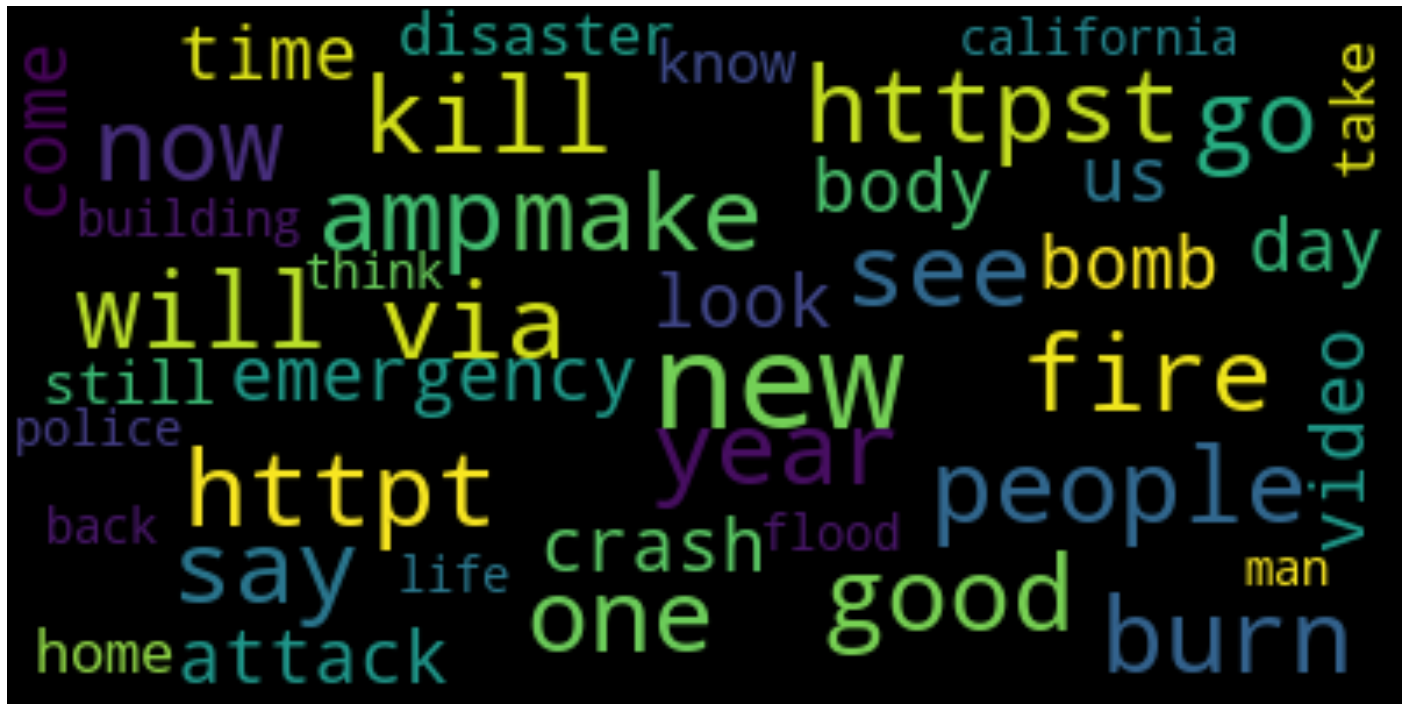

In [36]:
def plot_word_cloud(terms):
    text = terms.index
    text = ' '.join(list(text))
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure(figsize=(25, 25))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
tfidf2 = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf2.columns = ['tfidf']
plot_word_cloud(tfidf2.sort_values(by=['tfidf'], ascending=True).head(100))

In [37]:
def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += w2v_model[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError: # handling the case where the token is not
                         # in the corpus. useful for testing.
            continue
    if count != 0:
        vec /= count
    return vec

In [38]:
train_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_train)])
train_vecs_w2v = scale(train_vecs_w2v)

test_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_test)])
test_vecs_w2v = scale(test_vecs_w2v)

print ('shape for training set : ',train_vecs_w2v.shape,
      '\nshape for test set : ', test_vecs_w2v.shape)

shape for training set :  (6090, 300) 
shape for test set :  (1523, 300)


In [34]:
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=300))
model.add(Dropout(0.7))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adadelta',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               38528     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 38,657
Trainable params: 38,657
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = model.fit(train_vecs_w2v, y_train, epochs=20, batch_size=50,
                   validation_data=(test_vecs_w2v,y_test))
loss, accuracy = model.evaluate(train_vecs_w2v, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_vecs_w2v, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
122/122 [==============================] - 1s 5ms/step - loss: 1.0170 - accuracy: 0.5130 - val_loss: 0.7313 - val_accuracy: 0.5719
Epoch 2/20
122/122 [==============================] - 0s 3ms/step - loss: 1.0158 - accuracy: 0.5171 - val_loss: 0.7279 - val_accuracy: 0.5745
Epoch 3/20
122/122 [==============================] - 0s 3ms/step - loss: 0.9942 - accuracy: 0.5151 - val_loss: 0.7247 - val_accuracy: 0.5758
Epoch 4/20
122/122 [==============================] - 0s 3ms/step - loss: 1.0053 - accuracy: 0.5153 - val_loss: 0.7218 - val_accuracy: 0.5785
Epoch 5/20
122/122 [==============================] - 1s 4ms/step - loss: 0.9988 - accuracy: 0.5179 - val_loss: 0.7188 - val_accuracy: 0.5863
Epoch 6/20
122/122 [==============================] - 0s 3ms/step - loss: 0.9919 - accuracy: 0.5297 - val_loss: 0.7161 - val_accuracy: 0.5877
Epoch 7/20
122/122 [==============================] - 0s 3ms/step - loss: 0.9611 - accuracy: 0.5330 - val_loss: 0.7134 - val_accuracy: 0.5909
Epoch 

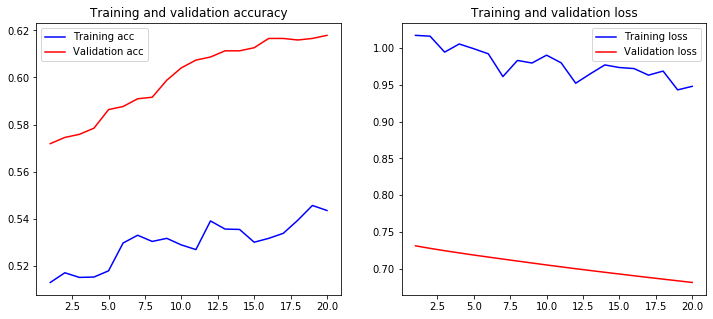

In [48]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)

# Training your model

In [50]:
#WORD2VEC()
cores = multiprocessing.cpu_count() # Count the number of cores in a computer, important for a parameter of the model
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

#BUILD_VOCAB()
t = time()
w2v_model.build_vocab(df["tokens"], progress_per=1000)
print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

#TRAIN()
w2v_model.train(df["tokens"], total_examples=w2v_model.corpus_count, epochs=10000, report_delay=1)
print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.0 mins
Time to train the model: 11.57 mins


In [51]:
train_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_train)])
train_vecs_w2v = scale(train_vecs_w2v)

test_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_test)])
test_vecs_w2v = scale(test_vecs_w2v)

print ('shape for training set : ',train_vecs_w2v.shape,
      '\nshape for test set : ', test_vecs_w2v.shape)

/Users/julesbarbosa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/Users/julesbarbosa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


shape for training set :  (6090, 300) 
shape for test set :  (1523, 300)


In [52]:
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=300))
model.add(Dropout(0.7))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adadelta',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               38528     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 38,657
Trainable params: 38,657
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = model.fit(train_vecs_w2v, y_train, epochs=20, batch_size=50,
                   validation_data=(test_vecs_w2v,y_test))
loss, accuracy = model.evaluate(train_vecs_w2v, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_vecs_w2v, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
122/122 [==============================] - 1s 6ms/step - loss: 1.0684 - accuracy: 0.5048 - val_loss: 0.7979 - val_accuracy: 0.5259
Epoch 2/20
122/122 [==============================] - 0s 3ms/step - loss: 1.0450 - accuracy: 0.5223 - val_loss: 0.7928 - val_accuracy: 0.5318
Epoch 3/20
122/122 [==============================] - 1s 4ms/step - loss: 1.0097 - accuracy: 0.5266 - val_loss: 0.7882 - val_accuracy: 0.5318
Epoch 4/20
122/122 [==============================] - 1s 4ms/step - loss: 1.0370 - accuracy: 0.5192 - val_loss: 0.7837 - val_accuracy: 0.5332
Epoch 5/20
122/122 [==============================] - 1s 5ms/step - loss: 1.0229 - accuracy: 0.5261 - val_loss: 0.7794 - val_accuracy: 0.5332
Epoch 6/20
122/122 [==============================] - 1s 5ms/step - loss: 1.0252 - accuracy: 0.5227 - val_loss: 0.7753 - val_accuracy: 0.5345
Epoch 7/20
122/122 [==============================] - 1s 4ms/step - loss: 1.0545 - accuracy: 0.5278 - val_loss: 0.7712 - val_accuracy: 0.5404
Epoch 

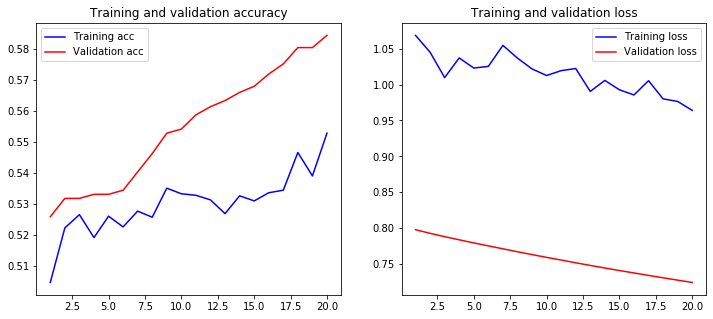

In [54]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)

# Convulutional Neural Network

In [126]:
all_words = [word for tokens in X for word in tokens]
all_sentence_lengths = [len(tokens) for tokens in X]
ALL_VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(ALL_VOCAB)))
print("Max sentence length is %s" % max(all_sentence_lengths))


####################### CHANGE THE PARAMETERS HERE #####################################
EMBEDDING_DIM = 300 # how big is each word vector
MAX_VOCAB_SIZE = 19053 # how many unique words to use (i.e num rows in embedding vector)
MAX_SEQUENCE_LENGTH = 34 # max number of words in a comment to use

117445 words total, with a vocabulary size of 19053
Max sentence length is 33


In [131]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, lower=True, char_level=False)
tokenizer.fit_on_texts(df["text"].tolist())
training_sequences = tokenizer.texts_to_sequences(X_train.tolist())

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))

train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = w2v_model[word] if word in w2v_model else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)


######################## TRAIN AND TEST SET #################################
train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)
test_sequences = tokenizer.texts_to_sequences(X_test.tolist())
test_cnn_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

Found 22700 unique tokens.
(22701, 300)


In [132]:
from keras.layers import concatenate
def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, trainable=False, extra_conv=True):
    
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=trainable)

    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    # Yoon Kim model (https://arxiv.org/abs/1408.5882)
    convs = []
    filter_sizes = [3,4,5]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=128, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(pool_size=3)(l_conv)
        convs.append(l_pool)

    l_merge = concatenate([convs[0],convs[1],convs[2]],axis=1)

    # add a 1D convnet with global maxpooling, instead of Yoon Kim model
    conv = Conv1D(filters=128, kernel_size=3, activation='relu')(embedded_sequences)
    pool = MaxPooling1D(pool_size=3)(conv)

    if extra_conv==True:
        x = Dropout(0.5)(l_merge)  
    else:
        # Original Yoon Kim model
        x = Dropout(0.5)(pool)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    # Finally, we feed the output into a Sigmoid layer.
    # The reason why sigmoid is used is because we are trying to achieve a binary classification(1,0) 
    # for each of the 6 labels, and the sigmoid function will squash the output between the bounds of 0 and 1.
    preds = Dense(1,activation='sigmoid')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy',
                  optimizer='adadelta',
                  metrics=['acc'])
    model.summary()
    return model

In [133]:
model = ConvNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, False)


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 34)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 34, 300)      6810300     input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_8 (Conv1D)               (None, 32, 128)      115328      embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_9 (Conv1D)               (None, 31, 128)      153728      embedding_2[0][0]                
____________________________________________________________________________________________

In [134]:
history = model.fit(train_cnn_data, y_train, epochs=10, batch_size=50,
                   validation_data=(test_cnn_data,y_test))
loss, accuracy = model.evaluate(train_cnn_data, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_cnn_data, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/10
122/122 [==============================] - 8s 67ms/step - loss: 0.7122 - acc: 0.4750 - val_loss: 0.6985 - val_acc: 0.4695
Epoch 2/10
122/122 [==============================] - 8s 64ms/step - loss: 0.7030 - acc: 0.4885 - val_loss: 0.6909 - val_acc: 0.5023
Epoch 3/10
122/122 [==============================] - 8s 63ms/step - loss: 0.6979 - acc: 0.5103 - val_loss: 0.6870 - val_acc: 0.5332
Epoch 4/10
122/122 [==============================] - 8s 63ms/step - loss: 0.6970 - acc: 0.5108 - val_loss: 0.6847 - val_acc: 0.5542
Epoch 5/10
122/122 [==============================] - 9s 72ms/step - loss: 0.6959 - acc: 0.5220 - val_loss: 0.6831 - val_acc: 0.5614
Epoch 6/10
122/122 [==============================] - 8s 64ms/step - loss: 0.6944 - acc: 0.5278 - val_loss: 0.6820 - val_acc: 0.5614
Epoch 7/10
122/122 [==============================] - 7s 58ms/step - loss: 0.6925 - acc: 0.5356 - val_loss: 0.6810 - val_acc: 0.5712
Epoch 8/10
122/122 [==============================] - 11s 86ms/step -